In [5]:
import numpy as np
import matplotlib.pyplot as plt

def drawpi(points = 1000) :
    r = 1.0
    incircle = 0

    x = np.random.random(points)
    y = np.random.random(points)
    c = np.empty(points)

    for i in range(points) :
        if x[i]**2 + y[i]**2 <= r**2 :
            c[i] = 1.0
            incircle += 1
        else :
            c[i] = 2.0

    with plt.xkcd():
        plt.figure(figsize=(6,6))
        plt.scatter(x, y, c=c, s=10)
        plt.show()    

    return 4*(incircle/points)    

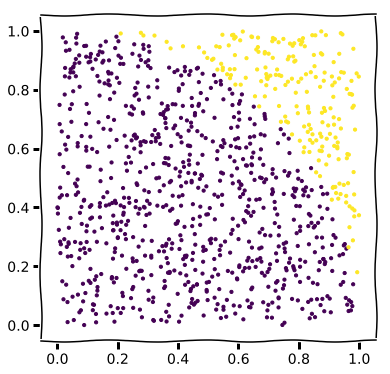

0

In [6]:
drawpi()

In [ ]:
class LCG:
    def __init__(self, seed = 1, Multiplier = 1366, Addend = 150889, Pmod = 714025):
        self.multiplier = Multiplier
        self.addend = Addend
        self.pmod = Pmod
        self.last = seed

    def random(self):
        self.last = (self.multiplier * self.last + self.addend) % self.pmod
        return self.last/self.pmod

    def randv(self, size = 1):
        v = np.empty(size)
        for i in range(size):
            v[i] = self.random()

        return v

    def randint(self, high, size=1):
        return (high*self.randv(size)).astype(int)

    def setseed(self, seed):
        self.last = seed

In [ ]:
lcgdef = LCG()
lcgdef.random()

In [ ]:
lcgdef.randint(10, size=10)

In [ ]:
def calcpi(lcg, num_trials = 10000):
    r = 1.0
    incircle = 0

    for i in range(num_trials) :
        x = lcg.random()
        y = lcg.random()
        if x*x + y*y <= r*r :
            incircle += 1
    
    return 4*(incircle/num_trials)    

In [ ]:
calcpi(lcgdef)

In [ ]:
import math

lcgdef.setseed(0)

for decade in range(8) :
    trials = 10**decade
    pi = calcpi(lcgdef, trials)
    print(f'{trials:8d} trials pi = {pi:.5f} deviation {abs(pi-math.pi):.5f}')

In [ ]:
lcgdef.setseed(0)

trials = 5*10**6
pi = calcpi(lcgdef, trials)
print(f'Ok:  {trials:8d} trials pi = {pi:.5f} deviation {abs(pi-math.pi):.5f}')

lcgbad = LCG(seed = 1, Multiplier = 65539, Addend = 0, Pmod = 2**31)

pi = calcpi(lcgbad, trials)
print(f'Bad: {trials:8d} trials pi = {pi:.5f} deviation {abs(pi-math.pi):.5f}')

In [ ]:
def drawpiLCG(lcg, points = 1000) :
    incircle = 0

    x = np.empty(points)
    y = np.empty(points)
    c = np.empty(points)

    for i in range(points) :
        x[i] = lcg.random()
        y[i] = lcg.random()
        if x[i]**2 + y[i]**2 <= 1.0 :
            c[i] = 1.0
            incircle += 1
        else :
            c[i] = 2.0

    with plt.xkcd():
        plt.figure(figsize=(6,6))
        plt.scatter(x, y, c=c, s=10)
        plt.show()

    return 4*(incircle/points)    

In [ ]:
drawpiLCG(lcgdef)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def draw3d(lcg, points = 20000):
    v = np.empty((3, points))

    for i in range(points) :
        for j in range(3) :
            v[j][i] = lcg.random()

    with plt.xkcd():
        fig = plt.figure(figsize=(20,16))
        ax = fig.add_subplot(111, projection='3d')
        ax.view_init(elev=50, azim=-45)
        ax.scatter(v[0], v[1], v[2], s=10, zdir='y')
        plt.show()

In [ ]:
draw3d(lcgbad)